# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
# if in workspace
!pip -q install ./python
import workspace_utils
from workspace_utils import active_session

import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# For workspace
# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

# For local
env = UnityEnvironment(file_name='Reacher_Windows_x86_64_20Agents/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.14849999668076636


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
from DDPG.ddpg_agent_multi import DDPG_Multi_Agent
agent2 = DDPG_Multi_Agent(state_size=state_size, action_size=action_size, n_agents=20,random_seed=1)

In [7]:
def train(algorithm, path , solution, agent, n_episodes, max_t): #
    """
    Parameters:
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    Other function parameters:
        algorithm (str): name of the type of DQN used 
        path (str): location where to save the trained parameters of the network
        solution (str): it will complement the name of the file that holds the trained parameters so we can have
        solution1, solution2....solutionN
    """
    
    print('Initializing ' + algorithm + ' train...')
    
    scores = []                        # list containing scores from each episode
    average_scores = []                # list containing the average scores every 100 episodes
    max_score = 0
    enviroment_solved = 0
    scores_window = deque(maxlen=100)  # last 100 scores
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]   # reset the environment
        states = env_info.vector_observations               # get the current state
        episode_scores = np.zeros(num_agents)               # scores for each agent 
        
        for t in range(max_t):
            
            actions = agent.act(states)                 # select an action
            env_info = env.step(actions)[brain_name]   # send the action to the environment
            next_states = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done                    # see if episode has finished
            agent.step(states, actions, rewards, next_states, dones , t)
            states = next_states
            episode_scores += np.array(rewards)
            if np.any(dones):
                break 
                
        score = np.mean(episode_scores)         # Summary of scores for this episode        
        scores_window.append(score)             # save most recent score
        scores.append(score)                    # save most recent score
        
        print('\rEpisode {}\t'.format(i_episode) + algorithm +' Average Score: {:.2f}'.format(np.mean(scores_window)), end="")
        average_scores.append(np.mean(scores_window))              # save the average score
        if i_episode % 100 == 0:
            print('\rEpisode {}\t'.format(i_episode) + algorithm +' Average Score: {:.2f}'.format(np.mean(scores_window)))
        if np.mean(scores_window)>=30.0 and enviroment_solved == 0:
            print('\nEnvironment solved in {:d} episodes!\t'.format(i_episode) + algorithm +' Average Score: {:.2f}'.format(np.mean(scores_window)))
            enviroment_solved = 1
        if i_episode % 100 == 0 and np.mean(scores_window)>= max_score:   
            torch.save(agent.actor_local.state_dict(), path + algorithm + '_' + solution + '_checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), path + algorithm + '_' + solution + '_checkpoint_critic.pth')
            max_score = np.mean(scores_window)
        if i_episode==n_episodes: 
            break
               
    # Saving the scores   
    with open(path + algorithm + '_' + solution +'_scores.txt','w') as file:
        for score, average in zip(scores, average_scores):
            file.write(('%2f\t, %2f\n') % (score, average))
    file.close()
    
    print(algorithm +' done.!')
    return scores, average_scores

In [8]:
N = 400     # number of episodes
T = 1000  # max number of time steps
agent = agent2 
algorithm = 'DDPG_multi'
solution = 'solution2_MultiAgent'
path = 'DDPG/' # where to save the scores
with active_session():
    ddpg_scores, ddpg_average_scores = train(algorithm, path, solution, agent, N, T)

Initializing DDPG_multi train...
Episode 100	DDPG_multi Average Score: 5.53
Episode 200	DDPG_multi Average Score: 21.71
Episode 269	DDPG_multi Average Score: 30.01
Environment solved in 269 episodes!	DDPG_multi Average Score: 30.01
Episode 300	DDPG_multi Average Score: 31.66
Episode 400	DDPG_multi Average Score: 32.69
DDPG_multi done.!


In [4]:
# This functions get the scores
def get_scores(algorithm, path, solution):
    score = []
    average = []
    with open(path + algorithm + '_' + solution +'_scores.txt') as file:
        for line in file:
            score.append(float(line.split()[0]))
            average.append(float(line.split()[2]))
    file.close()
    return score, average

In [5]:
# To get all the scores from a .txt file. 'no need to train again if notebook is reloaded'
algorithm = 'DDPG_multi'
path = 'DDPG/' # where to read the scores
solution = 'solution2_MultiAgent'
ddpg_scores, ddpg_average_scores = get_scores(algorithm, path, solution)

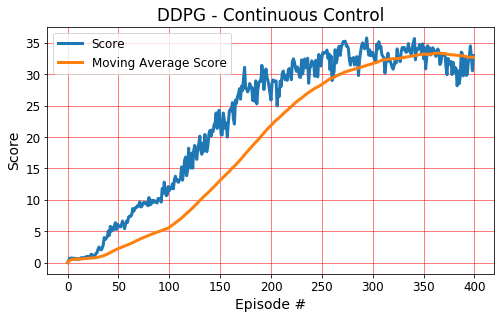

In [14]:
# plot the scores
fig = plt.figure(figsize=(8,10))
font = {'size'   : 14}
plt.rc('font', **font)
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
ax1 = fig.add_subplot(211)
plt.plot(np.arange(len(ddpg_scores)), ddpg_scores, linewidth=3)
plt.plot(np.arange(len(ddpg_average_scores)), ddpg_average_scores, linewidth=3)
ax1.legend(['Score', 'Moving Average Score'])  #,loc=4
ax1.grid(linestyle='-', linewidth='0.5', color='red')
plt.title('DDPG - Continuous Control')
plt.ylabel('Score')
plt.xlabel('Episode #')

plt.show()

In [7]:
# load the weights from file FORM GPU TO CPU
agent2.actor_local.load_state_dict(torch.load('DDPG/DDPG_multi_solution2_MultiAgent_checkpoint_actor.pth',map_location=torch.device('cpu')))
agent2.critic_local.load_state_dict(torch.load('DDPG/DDPG_multi_solution2_MultiAgent_checkpoint_critic.pth',map_location=torch.device('cpu')))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations               # get the current state
score = np.zeros(num_agents)                                          # initialize the score
        
while True:
    action = agent2.act(state)                     # select an action
    env_info = env.step(action)[brain_name]   # send the action to the environment
    next_state = env_info.vector_observations   # get the next state
    reward = env_info.rewards                   # get the reward
    done = env_info.local_done                  # see if episode has finished
    score += np.array(reward)                               # update the score
    state = next_state                             # roll over the state to next time step
    if np.any(done):                                       # exit loop if episode finished
        break
    
print("Score: {}".format(np.mean(score)))

c:\users\abdullah\anaconda3\envs\deeprl\lib\site-packages\torch\nn\functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Score: 34.09199923798442
